High level imports:

In [1]:
from lenses import lens
from toolz import compose

First we establish a connection to S3 and get the data file.

In [2]:
import boto3

In [3]:
AWS_STORAGE_BUCKET_NAME = "hdx-base-resources"
CONTEXTUAL_RELATIONS_DIRECTORY = "static/data/collect/ontology/contextual_relations"

In [4]:
s3 = boto3.client('s3')
files = s3.list_objects_v2(Bucket=AWS_STORAGE_BUCKET_NAME, Prefix=CONTEXTUAL_RELATIONS_DIRECTORY)
for file_name in lens["Contents"].Each()["Key"].collect()(files):
    print(file_name)

static/data/collect/ontology/contextual_relations/contextual_relations_2018-07-09-21:16:04(+0000)_to_2018-07-27-21:33:38(+0000).tsv


In [5]:
file_name = input("Which file would you like to use? ")
s3_key_name = u"%s/%s" % (CONTEXTUAL_RELATIONS_DIRECTORY, file_name)
print(s3_key_name)
obj = s3.get_object(Bucket=AWS_STORAGE_BUCKET_NAME, Key=s3_key_name)

Which file would you like to use? contextual_relations_2018-07-09-21:16:04(+0000)_to_2018-07-27-21:33:38(+0000).tsv
static/data/collect/ontology/contextual_relations/contextual_relations_2018-07-09-21:16:04(+0000)_to_2018-07-27-21:33:38(+0000).tsv


Now load and extract the data:

In [6]:
import pandas as pd
import io

In [7]:
import dateutil.parser

In [8]:
df = pd.read_csv(io.BytesIO(obj['Body'].read()), delimiter="\t")
df["updated_at"] = df["updated_at"].map(dateutil.parser.parse)
df

,term1,term2,relationship,accuracy,notes,updated_at,updated_by_name,updated_by_id,interaction_uuid,context_specifier,context_object_id,context_class_id,context_service_id,context_isrl
0,Stevens Johnson syndrome,Stevens johnson,SYN,C,NaN,2018-07-09 21:16:04.700424+00:00,Joaquin Blaya,11764,NaN,U,66090,23,0,CAEQABgXIKqEBA==
1,SJS,Stevens Johnson syndrome,AB,C,NaN,2018-07-09 21:16:39.161498+00:00,Joaquin Blaya,11764,NaN,U,66090,23,0,CAEQABgXIKqEBA==
2,DRESS,DRESS syndrome,AB,C,NaN,2018-07-09 21:18:18.816252+00:00,Joaquin Blaya,11764,NaN,U,66090,23,0,CAEQABgXIKqEBA==
3,Cushing's syndrome,Cushings,SYN,C,NaN,2018-07-10 15:03:18.546204+00:00,Scott Wong,175,NaN,U,57714,23,0,CAEQABgXIPLCAw==
4,Cushing's disease,Cushing's syndrome,SYN,C,NaN,2018-07-10 15:06:35.263455+00:00,Scott Wong,175,NaN,U,57714,23,0,CAEQABgXIPLCAw==
5,DEPRESSION,Major depression,SYN,C,NaN,2018-07-20 16:36:30.559282+00:00,Joaquin Blaya,11764,NaN,U,34912,23,0,CAEQABgXIOCQAg==
6,Major depression,Major depressive disorder,SYN,C,NaN,2018-07-20 16:37:31.061330+00:00,Joaquin Blaya,11764,NaN,U,34912,23,0,CAEQABgXIOCQAg==
7,Adverse drug interaction,Medication side effect,TFC,C,NaN,2018-07-20 16:41:13.306892+00:00,Joaquin Blaya,11764,NaN,U,34912,23,0,CAEQABgXIOCQAg==
8,Adverse drug interaction,Serotonin syndrome,TFC,C,NaN,2018-07-20 16:49:36.727445+00:00,Joaquin Blaya,11764,NaN,U,34912,23,0,CAEQABgXIOCQAg==
9,PUD - Peptic ulcer disease,Peptic ulcer disease,AB,C,NaN,2018-07-20 16:53:59.172763+00:00,Joaquin Blaya,11764,NaN,U,34918,23,0,CAEQABgXIOaQAg==


Now we process the data to the format requested.

We begin by processing the table to get an idea of how much time was spent merging diagnoses for each case, as described in https://app.asana.com/0/0/748422265572447/f
(Note that case urls are not directly available)

In [9]:
merge_time_df = df.groupby("context_object_id").aggregate({
    "context_object_id": "count",
    "updated_by_name": "unique",
    "updated_at": [min, max],
})
merge_time_df["Total Time"] = merge_time_df["updated_at"]["max"] - merge_time_df["updated_at"]["min"]
merge_time_df

context_object_id                      updated_by_name  \
                              count                               unique   
context_object_id                                                          
34258                             1                         [Scott Wong]   
34912                             4                      [Joaquin Blaya]   
34918                            15  [Joaquin Blaya, Edelmira Rodriguez]   
34919                            43  [Edelmira Rodriguez, Joaquin Blaya]   
35050                             4                 [Edelmira Rodriguez]   
35104                            18                 [Edelmira Rodriguez]   
35118                            25                 [Edelmira Rodriguez]   
35349                             4                 [Edelmira Rodriguez]   
35355                            19                 [Edelmira Rodriguez]   
35629                            11                 [Edelmira Rodriguez]   
35630                             8                 [Edelmira Rodriguez]   
35692                            10                 [Edelmira Rodriguez]   
35716                            26                 [Edelmira Rodriguez]   
35987                            22                 [Edelmira Rodriguez]   
36015                            19                 [Edelmira Rodriguez]   
36223                             7                 [Edelmira Rodriguez]   
36224                            21  [Edelmira Rodriguez, Joaquin Blaya]   
36228                            11                 [Edelmira Rodriguez]   
36250                             4                 [Edelmira Rodriguez]   
36282                             8                 [Edelmira Rodriguez]   
36377                             9                 [Edelmira Rodriguez]   
36382                             7                 [Edelmira Rodriguez]   
36769                             7                 [Edelmira Rodriguez]   
36808                             8                 [Edelmira Rodriguez]   
38921                             6                 [Edelmira Rodriguez]   
38925                            11                 [Edelmira Rodriguez]   
38926                             9                 [Edelmira Rodriguez]   
56503                             2                      [Joaquin Blaya]   
57714                             2                         [Scott Wong]   
66090                             3                      [Joaquin Blaya]   
73579                             4                         [Scott Wong]   

                                        updated_at  \
                                               min   
context_object_id                                    
34258             2018-07-23 14:09:52.479554+00:00   
34912             2018-07-20 16:36:30.559282+00:00   
34918             2018-07-20 16:53:59.172763+00:00   
34919             2018-07-24 04:16:37.477253+00:00   
35050             2018-07-24 03:24:32.101143+00:00   
35104             2018-07-24 01:09:29.686199+00:00   
35118             2018-07-24 06:43:27.151797+00:00   
35349             2018-07-24 08:55:03.380540+00:00   
35355             2018-07-24 17:31:37.164767+00:00   
35629             2018-07-26 20:58:15.074138+00:00   
35630             2018-07-25 01:36:17.269366+00:00   
35692             2018-07-25 05:35:05.787145+00:00   
35716             2018-07-25 06:33:30.174061+00:00   
35987             2018-07-25 18:19:40.677440+00:00   
36015             2018-07-26 04:48:28.684095+00:00   
36223             2018-07-27 05:20:28.651874+00:00   
36224             2018-07-23 21:21:35.518553+00:00   
36228             2018-07-26 08:23:27.935671+00:00   
36250             2018-07-26 10:04:19.087215+00:00   
36282             2018-07-26 10:43:30.812889+00:00   
36377             2018-07-27 00:54:51.329259+00:00   
36382             2018-07-26 23:51:45.677860+00:00   
36769             2018-07-27 03:21:18.050663+00:00   
36808             2018-07-26 

Next rename the columns to something more understandable

In [10]:
merge_time_df.columns = ["edge_count", "reviewers", "first_merge_time", "last_merge_time", "total_time"]
merge_time_df.index.name = "case_id"
merge_time_df

,edge_count,reviewers,first_merge_time,last_merge_time,total_time
case_id,,,,,
34258,1,[Scott Wong],2018-07-23 14:09:52.479554+00:00,2018-07-23 14:09:52.479554+00:00,0 days 00:00:00
34912,4,[Joaquin Blaya],2018-07-20 16:36:30.559282+00:00,2018-07-20 16:49:36.727445+00:00,0 days 00:13:06.168163
34918,15,"[Joaquin Blaya, Edelmira Rodriguez]",2018-07-20 16:53:59.172763+00:00,2018-07-24 18:59:14.377746+00:00,4 days 02:05:15.204983
34919,43,"[Edelmira Rodriguez, Joaquin Blaya]",2018-07-24 04:16:37.477253+00:00,2018-07-24 21:38:09.465475+00:00,0 days 17:21:31.988222
35050,4,[Edelmira Rodriguez],2018-07-24 03:24:32.101143+00:00,2018-07-24 19:18:33.867501+00:00,0 days 15:54:01.766358
35104,18,[Edelmira Rodriguez],2018-07-24 01:09:29.686199+00:00,2018-07-24 22:05:28.971128+00:00,0 days 20:55:59.284929
35118,25,[Edelmira Rodriguez],2018-07-24 06:43:27.151797+00:00,2018-07-26 08:00:33.757372+00:00,2 days 01:17:06.605575
35349,4,[Edelmira Rodriguez],2018-07-24 08:55:03.380540+00:00,2018-07-24 09:10:23.664751+00:00,0 days 00:15:20.284211
35355,19,[Edelmira Rodriguez],2018-07-24 17:31:37.164767+00:00,2018-07-25 01:14:51.077417+00:00,0 days 07:43:13.912650


Save the data as a csv

In [11]:
output_file_name = input("Where would you like to save this table?")
merge_time_df.to_csv(output_file_name)

Where would you like to save this table?for_joa


Finally generate charts of relevant variables

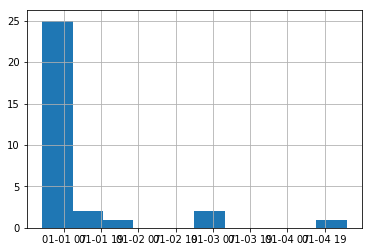

In [18]:
pd.to_datetime(merge_time_df["total_time"]).hist()

Next we output the data in a format suitable to Health Ontology, as described in https://app.asana.com/0/0/748422265572448/f
(Note that the terms do not have ref_id's)

In [20]:
# We need to identify the most recent relationship, so group by case_id and pairs of terms
health_ontology_all_df = df.sort_values(by="updated_at") \
    .groupby(["context_isrl", "term1", "term2"], as_index=False) \
    .aggregate({
        "relationship": "last",
        "accuracy": "last"
    })
# Next filter for correct relationships:
health_ontology_filtered_df = health_ontology_all_df[health_ontology_all_df["accuracy"] == "C"]
# remove TFC relationships
health_ontology_filtered_df = health_ontology_filtered_df[health_ontology_filtered_df["relationship"] != "TFC"]

In [21]:
# Finally, group by pairs of terms:
health_ontology_df = health_ontology_filtered_df.groupby(["term1", "term2"], as_index=False) \
    .aggregate({
        "relationship": "unique",
})

In [22]:
health_ontology_df

,term1,term2,relationship
0,Achilles rupture,achilles tendon rupture,[SYN]
1,Achilles tendonitis,Achilles tendonitiz,[MSP]
2,Achilles tendonitis,Right achilles tendonitis,[SYN]
3,Anxiety,Anxiety disorder,[SYN]
4,Aortic disection,Aortic dissection,[MSP]
5,Atopic dermatitis,"Atopic dermatitis, unspecified",[SYN]
6,Atopic dermatitis,Eczema,[SYN]
7,CA - Cancer of colon,Colon cancer,[ALT]
8,CHF,Congestive heart failure,[AB]
9,CLL,CLL - Chronic lymphocytic leukemia,[AB]


Save the data to a csv

In [16]:
output_file_name = input("Where would you like to save this table?  ")
health_ontology_df.to_csv(output_file_name)

Where would you like to save this table?  for_joa_2
